# HW5. Curve fitting

주어진 실험데이터 (“data_set_과제1.txt“)는 $(t_n, x_n)$ 꼴입니다. 주어진 데이터가 $x=vt+\frac{at^2}{2}$로 표현된다고 할 때, \\
1) 경사 하강법으로 v, a를 구하고 (50점) 실험 데이터와 함께 그려 잘 맞는지 확인하세요 (25점). \\
2) 오차의 수렴과정을 E vs t의 그래프로 그리세요 (25점).

v =  6.701640871898689
a =  6.711394606137156


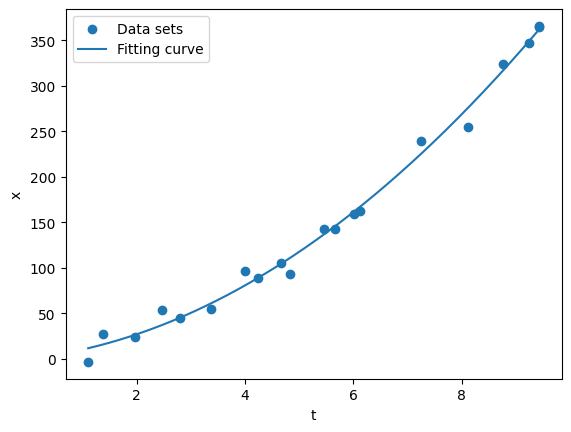

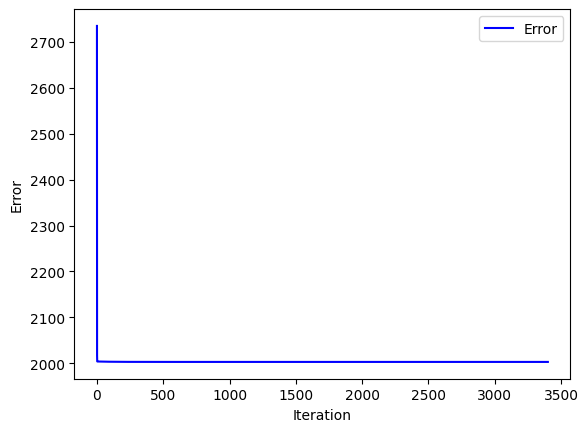

In [ ]:
import numpy as np, matplotlib.pyplot as plt
data=np.loadtxt("/content/sample_data/data_set_과제1.txt")
t = data[:,0]
x = data[:,1]

eps = 1.0E-6; c= 0.0001; va = [6.5, 6.5]; dva = [0.001, 0.001]; delta_va = [0.01, 0.01]
r = np.arange(min(t), max(t), 0.01)

def f(vars, x):
  return vars[0]*x+vars[1]/2*x**2

def gradient(f, vars, dvars, delta_vars):
  n = len(vars)

  err = []
  delta_var = np.array(delta_vars)

  while np.any(np.abs(delta_var)>eps):
    err.append(np.sum((f(vars, t)-x)**2))

    for i in range(n):
      delta_var[i] = np.sum((f(vars,t)-x)*(f(vars+dvars[i]*np.eye(n)[i], t)-f(vars, t))/dvars[i])
    vars -= c*delta_var

  return vars, err

vars, err = gradient(f, va, dva, delta_va)
print("v = ", vars[0])
print("a = ", vars[1])

r = np.arange(min(data[:,0]), max(data[:,0]), 0.01)
plt.scatter(t, x, label = "Data sets")
plt.plot(r, f(vars, r), label = "Fitting curve")
plt.xlabel("t")
plt.ylabel("x")
plt.legend()
plt.show()

plt.plot(err, color="blue", label="Error")
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.legend()
plt.show()

조절변수 $\vec{a}=(a_1, a_2, \cdots a_M)$이 만드는 함수 $f(x_n;\vec{a})$에 대해 경사하강법을 적용하기 위해서는 오차함수 $E(\vec{a}) = \sum^N_{n=1}[y_n-f(x_n;\vec{a})]^2$에 대해 $$\dfrac{\partial E}{\partial a_i} = -2\sum^N_{n=1}[y_n-f(x_n;\vec{a})]\dfrac{\partial f(x_n;\vec{a})}{\partial a_i}$$ 을 계산한 뒤 $$a_i \rightarrow a_i-c\dfrac{\partial E}{\partial a_i}$$의 과정을 통해 각 조절변수에 대해 경사하강법을 적용하면 된다. \\
위의 코드는 앞서 설명한 방법을 통해 주어진 data set에 대해 경사하강법을 적용해 적절한 2차함수의 식과 오차 수렴과정을 그래프로 나타낸 코드이다. 변수 t는 주어진 data set의 첫번째 열을, 변수 x는 주어진 data set의 두번째 열을 리스트의 형태로 저장한다. 변수 eps는 경사하강법의 오차범위를 나타내는 변수로 1.0E-6로 설정하였으며, 변수 c는 조절변수 $a_i$를 업데이트할 때 변수의 조절정도를 나타내는 변수로 0.0001로 설정하였다. 리스트 va, dva, delta_va는 각각 변수 v와 a의 초깃값, 편미분시 사용되는 값, 변수의 갱신을 위해 사용되는 값(편미분값)을 담은 리스트이다. va의 초깃값은 두 변수 다 6.5로 설정하였으며, dva의 초깃값은 두 변수 다 0.01, delta_va의 초깃값은 두 변수 다 0.1로 설정하였다. r은 t의 최솟값부터 최댓값을 0.01의 간격으로 나눈 배열이다. 사용자 정의함수 f(vars, x)는 구하려고 하는 변수의 리스트인 vars와 x값을 입력받아 변수와 x로 구성된 함숫값을 반환한다. 본 코드에서 vars[0]은 v, vars[1]은 a를 의미하며, 최종적으로 $vt+\frac{at^2}{2}$의 값을 반환한다. \\
사용자 정의함수 gradient(f, vars, dvars, delta_vars)는 함수 f, vars, dvars, delta_vars를 입력받아 delta_vars의 값들이 eps보다 작아질 때 까지 경사하강법을 적용한 뒤, 업데이트된 변수와 오차값들을 반환하는 함수이다. 변수 n은 리스트 vars의 길이를 나타내며, 조절변수의 개수를 의미한다. 리스트 err는 경사하강법의 시도 횟수에 따른 오차값을 저장하며, 이후 while문을 통해 변수 vars에 대해 경사하강법을 적용한다. while문 내에서 리스트 err에 오차를 저장한 뒤 각 조절변수 $a_i$에 대해 경사하강법을 적용한다. while문 내의


```
for i in range(n):
  delta_var[i] = np.sum((f(vars,t)-x)*(f(vars+dvars[i]*np.eye(n)[i], t)-f(vars, t))/dvars[i])
vars -= c*delta_var
```
부분은 앞서 설명한 $$\dfrac{\partial E}{\partial a_i} = -2\sum^N_{n=1}[y_n-f(x_n;\vec{a})]\dfrac{\partial f(x_n;\vec{a})}{\partial a_i}$$ 과정과 $$a_i \rightarrow a_i-c\dfrac{\partial E}{\partial a_i}$$ 과정을 나타낸다. delta_vars의 모든 원소가 eps보다 오차가 적어지면 while문이 끝나며, 이후 업데이트된 변수 vars와 오차값 리스트 err을 반환한다.
주어진 f, va, dva, delta_va에 대해 gradient 함수를 적용하여 변수 vars와 err에 저장한 뒤 v값과 a값을 출력하였으며, 이를 기반으로 주어진 data set과 fitting curve를 나타낸 그래프와 시도횟수에 따른 오차를 나타낸 그래프를 작성하였다. \\
위의 과정을 통해 도출 된 v값은 약 6.7016이었으며, a값은 약 6.7113이다. 위의 그래프로부터 경사하강법을 통해 도출된 fitting curve가 주어진 data set과 대체로 잘 일치함을 확인할 수 있었다.

주어진 실험데이터 (“data_set_과제2.txt“)는 $(t_n, x_n)$ 꼴입니다. 주어진 데이터가 $x=A\cos\omega t+\phi$로 표현된다고 할 때, \\
1) 경사 하강법으로 $A, \omega, \phi$를 구하고 (50점) 실험 데이터와 함께 그려 잘 맞는지 확인하세요 (25점). \\
2) 오차의 수렴과정을 E vs t의 그래프로 그리세요 (25점).

A =  8.58644613147115
omega =  2.070785505369108
phi =  -0.5251984044277238


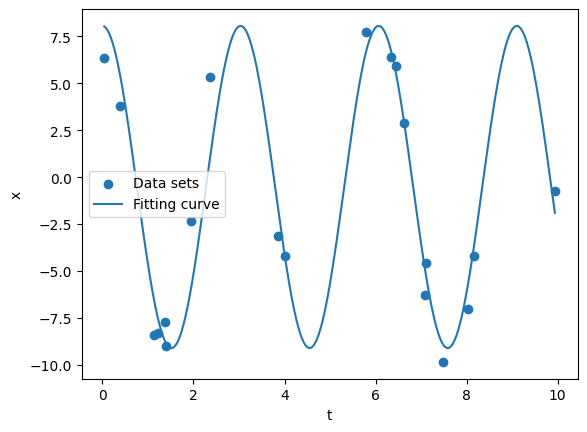

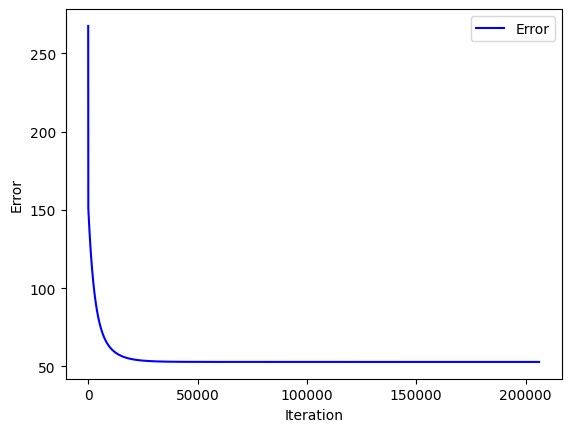

In [ ]:
import numpy as np, matplotlib.pyplot as plt
data=np.loadtxt("/content/sample_data/data_set_과제2.txt")
t = data[:,0]
x = data[:,1]

eps = 1.0E-6; c= 0.00001; Awp = [6, 2, 0.5]; dAwp = [0.1, 0.1, 0.1]; delta_Awp = [0.1, 0.1, 0.1]
r = np.arange(min(t), max(t), 0.01)

def f(vars, x):
  return vars[0]*np.cos(vars[1]*x)+vars[2]

def gradient(f, vars, dvars, delta_vars):
  n = len(vars)

  err = []
  delta_var = np.array(delta_vars)

  while np.any(np.abs(delta_var)>eps):
    err.append(np.sum((f(vars, t)-x)**2))

    for i in range(n):
      delta_var[i] = np.sum((f(vars,t)-x)*(f(vars+dvars[i]*np.eye(n)[i], t)-f(vars, t))/dvars[i])
    vars -= c*delta_var

  return vars, err

vars, err = gradient(f, Awp, dAwp, delta_Awp)

print("A = ", vars[0])
print("omega = ", vars[1])
print("phi = ", vars[2])

r = np.arange(min(data[:,0]), max(data[:,0]), 0.01)

plt.scatter(t, x, label = "Data sets")
plt.plot(r, f(vars, r), label = "Fitting curve")
plt.xlabel("t")
plt.ylabel("x")
plt.legend()
plt.show()

plt.plot(err, color="blue", label="Error")
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.legend()
plt.show()

위의 코드는 앞서 설명한 방법을 통해 주어진 data set에 대해 경사하강법을 적용해 적절한 삼각함수의 식과 오차 수렴과정을 그래프로 나타낸 코드이다. 대략적인 코드구성은 이전 문제와 동일하며, 본 코드에서 변수 c는 조절변수 $a_i$를 업데이트할 때 변수의 조절정도를 나타내는 변수로 0.00001로 설정하였다. 리스트 Awp, dAwp, delta_Awp는 각각 변수 A와 $\omega$, $\phi$의 초깃값, 편미분시 사용되는 값, 변수의 갱신을 위해 사용되는 값(편미분값)을 담은 리스트로 설정하였다. Awp의 초깃값은 A는 6, $\omega$는 2, $\phi$는 0.5로 설정하였으며, dAwp의 초깃값은 세 변수 다 0.1, delta_Awp의 초깃값은 세 변수 다 0.1로 설정하였다. 사용자 정의함수 f(vars, x)는 구하려고 하는 변수의 리스트인 vars와 x값을 입력받아 변수와 x로 구성된 함숫값을 반환한다. 본 코드에서 vars[0]은 A, vars[1]은 $\omega$, vars[2]는 $\phi$를 의미하며, 최종적으로 $A\cos\omega t+\phi$의 값을 반환한다. \\
사용자 정의함수 gradient(f, vars, dvars, delta_vars)는 함수 f, vars, dvars, delta_vars를 입력받아 delta_vars의 값들이 eps보다 작아질 때 까지 경사하강법을 적용한 뒤, 업데이트된 변수와 오차값들을 반환하는 함수이다. 변수 n은 리스트 vars의 길이를 나타내며, 조절변수의 개수를 의미한다. 리스트 err는 경사하강법의 시도 횟수에 따른 오차값을 저장하며, 이후 while문을 통해 변수 vars에 대해 경사하강법을 적용한다. while문 내에서 리스트 err에 오차를 저장한 뒤 각 조절변수 $a_i$에 대해 경사하강법을 적용한다. while문 내의


```
for i in range(n):
  delta_var[i] = np.sum((f(vars,t)-x)*(f(vars+dvars[i]*np.eye(n)[i], t)-f(vars, t))/dvars[i])
vars -= c*delta_var
```
부분은 앞서 설명한 $$\dfrac{\partial E}{\partial a_i} = -2\sum^N_{n=1}[y_n-f(x_n;\vec{a})]\dfrac{\partial f(x_n;\vec{a})}{\partial a_i}$$ 과정과 $$a_i \rightarrow a_i-c\dfrac{\partial E}{\partial a_i}$$ 과정을 나타낸다. delta_vars의 모든 원소가 eps보다 오차가 적어지면 while문이 끝나며, 이후 업데이트된 변수 vars와 오차값 리스트 err을 반환한다.
주어진 f, Awp, dAwp, delta_Awp에 대해 gradient 함수를 적용하여 변수 vars와 err에 저장한 뒤 A값, $\omega$값, $\phi$값을 출력하였으며, 이를 기반으로 주어진 data set과 fitting curve를 나타낸 그래프와 시도횟수에 따른 오차를 나타낸 그래프를 작성하였다. \\
위의 과정을 통해 도출 된 A값은 약 8.586 이었으며, $\omega$값은 약 2.071, $\phi$값은 약 -0.525 이다. 위의 그래프로부터 경사하강법을 통해 도출된 fitting curve가 주어진 data set과 대체로 잘 일치함을 확인할 수 있었다.